In [74]:
class pathingFunction:
    def __init__(self, inicio, fin, obstaculos):
        self.inicio = inicio
        self.fin = fin
        self.obstaculos = obstaculos
        
    
        
    def pathing(self):
        print('via points')
        
    
    

In [75]:
%matplotlib inline

import numpy as np
# import imageio
import matplotlib.pyplot as plt
# import pandas as pd
#import sklearn.datasets
import cv2 as cv
# import glob

# import os

# Cargar arreglo NumPy desde un archivo
from numpy import loadtxt
# Cargar Arreglo
punto_inicio = loadtxt('punto_inicio.csv', delimiter=',',dtype=np.int)
# Imprimir el arreglo
print(punto_inicio)
punto_final = loadtxt('punto_final.csv', delimiter=',',dtype=np.int)
# Imprimir el arreglo
print(punto_final)
obstaculos = loadtxt('obstaculos.csv', delimiter=',',dtype=np.int)
# Imprimir el arreglo
print(obstaculos)

[137 140]
[485 256]
[[366 240  84]
 [293 113  20]
 [213 166  20]
 [193 312  20]
 [236 372  20]
 [551 256  21]]


In [76]:
# funciones para segmentar color y buscar el centroide
def seg_color(src,bajos, altos):
    mask = cv.inRange(src, bajos, altos)
    return mask
        
def buscar_centroide(mask):

    moments = cv.moments(mask)
    area=moments['m00']
    
    x = int(moments['m10']/moments['m00'])
    y = int(moments['m01']/moments['m00'])
    
    # put text and highlight the center

    #cv.circle(mask, (x, y), 5, (0, 0, 0), -1)

    #cv.putText(mask, "centroid", (x - 25, y - 25),cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    cv.rectangle(mask,(x,y),(x+2, y+2),(0,0,0),2)#poner un punto en el centroide
    
    
    return mask,x,y

def radio_obstaculo(src,factor=1):
    #gray = cv.cvtColor(EspacioMin, cv.COLOR_BGR2GRAY)
    gray = cv.GaussianBlur(src, (7, 7), 3)

    t, dst = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_TRIANGLE)

    contours,_  = cv.findContours(dst, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    for c in contours:
        area = cv.contourArea(c)
        if area > 200 and area < 1000000:
            (x, y, w, h) = cv.boundingRect(c)
                                
            x=round(x - ((w*factor)/2) + (w/2))
            y=round(y - ((h*factor)/2) + (h/2))
            w = w*factor
            h = h*factor
            
            cv.rectangle(src, (x, y), (x + w, y + h), (255), 1, cv.LINE_AA)
            
    plt.figure(figsize=(12,12))
    plt.imshow(src, cmap='viridis')
    # cv.imshow('contornos', EspacioMin)
    # cv.imshow('umbral', dst)
    if (w) >= (h):
        radio = abs(w/2)*factor
        return round(radio)
    else:
        radio = abs(h/2)*factor
        return round(radio)
        
    
    # cv.waitKey(0)
    
def dibujarObs(mask,x,y,radio):
    #mask=np.zeros((mask.shape[0],mask.shape[1]),dtype=np.uint8)
    #Dibujando un círculos
    cv.circle(mask,(x,y),radio,(150),-1)
    return mask
#     plt.figure(figsize=(12,12))
#     plt.imshow(mask, cmap='viridis')

In [77]:
mask = np.zeros((480,640),dtype=np.uint8)

[366 240  84]
[293 113  20]
[213 166  20]
[193 312  20]
[236 372  20]
[551 256  21]


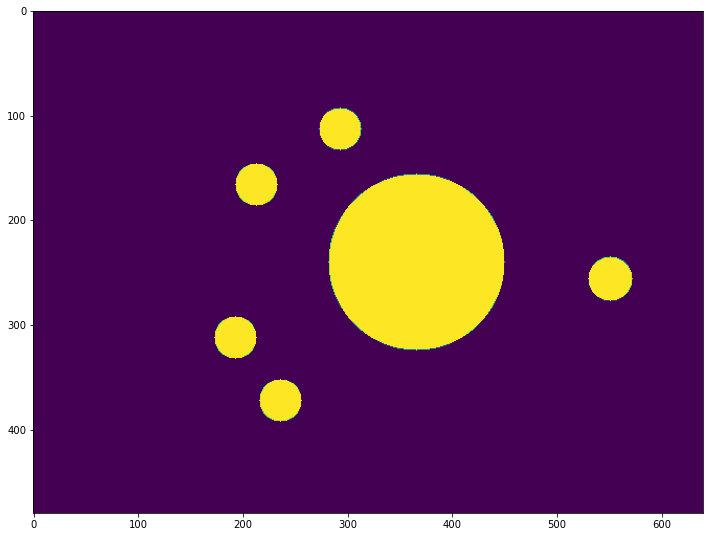

In [78]:
#hacer una funcion o algoritmo que dibuje punto inicial final y obstaculos
##inicial
#mask = dibujarObs(mask,int(punto_inicio[0]),int(punto_inicio[1]),radio=1)
# plt.figure(figsize=(12,12))
# plt.imshow(mask, cmap='viridis')

##final
#mask = dibujarObs(mask,int(punto_final[0]),int(punto_final[1]),radio=1)
# plt.figure(figsize=(12,12))
# plt.imshow(mask, cmap='viridis')
##obstaculos
for i in obstaculos:
    mask = dibujarObs(mask,i[0],i[1],i[2])
    print(i)
    
plt.figure(figsize=(12,12))
plt.imshow(mask, cmap='viridis')

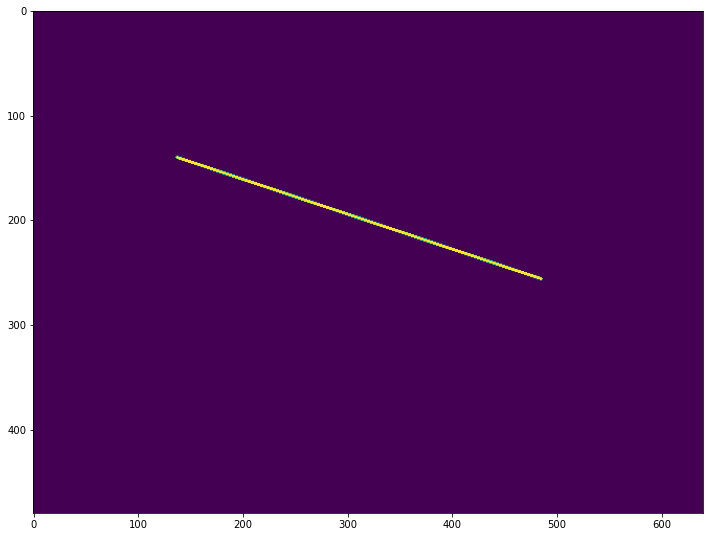

In [79]:
#dibujando una linea de inicio a fin

mask1 = np.zeros((480,640),dtype=np.uint8)

cv.line(mask1,(punto_inicio[0],punto_inicio[1]),(punto_final[0],punto_final[1]),(255),2)

plt.figure(figsize=(12,12))
plt.imshow(mask1, cmap='viridis')

[  0 105 255]


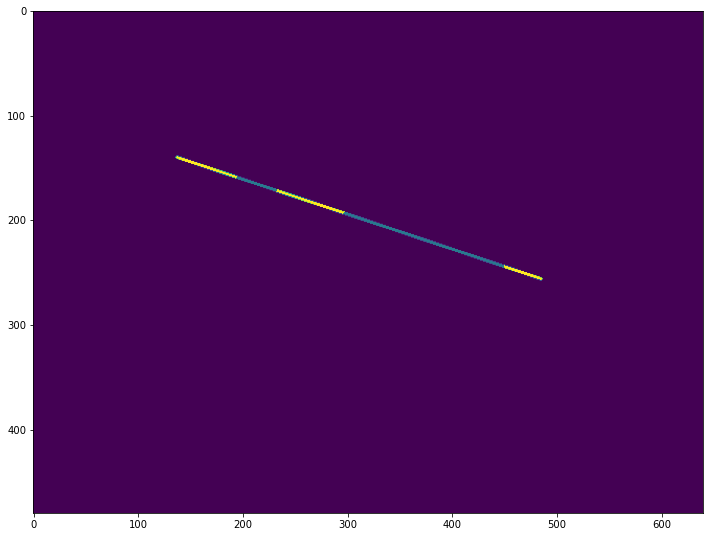

In [80]:
#comparando las 2 imagenes

diferencias=cv.subtract(mask1,mask)
plt.figure(figsize=(12,12))
plt.imshow(diferencias, cmap='viridis')
print(np.unique(diferencias))

(array([5], dtype=int64),)
[194]
[160]
[[213 166  20]]
[189.69449122 109.59014554  19.92485885 152.00328944 216.12033685
 369.68229603]
(array([2], dtype=int64),)


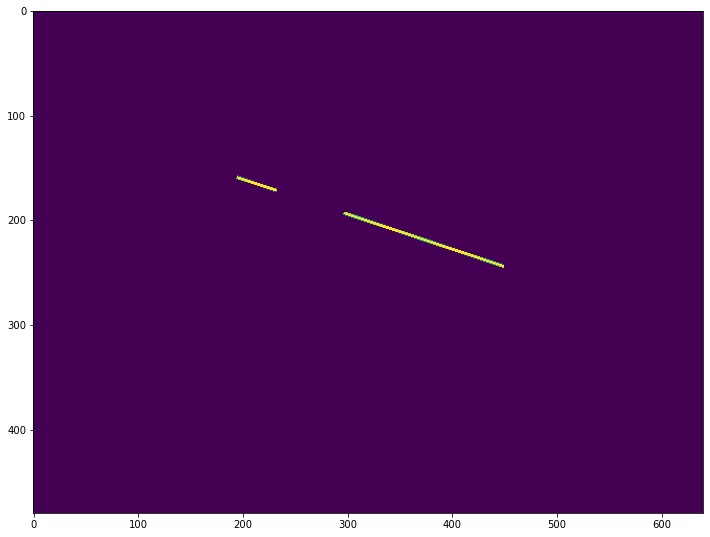

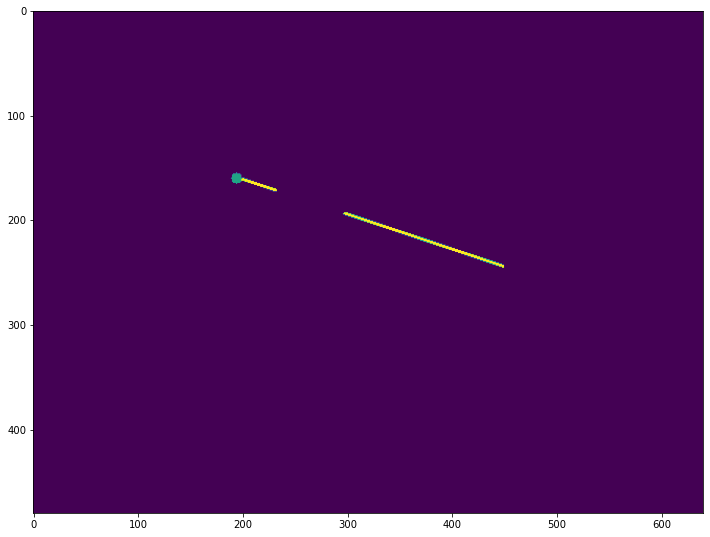

In [81]:
#el obstaculo mas cercano a inicio es?

#dibujando las intersecciones
inters = np.array([105], dtype=np.uint8)
maskInicio = seg_color(diferencias, inters, inters)
#print(maskInicio.shape)
plt.figure(figsize=(12,12))
plt.imshow(maskInicio, cmap='viridis')

##donde estan las intersecciones?
puntos_y, puntos_x=np.where(maskInicio)
##cual es el punto de interseccion mas cercano al inicio?
distancia = np.sqrt((puntos_x-punto_inicio[0])**2 + (puntos_y-punto_inicio[1])**2)
pos=np.where(distancia == min(distancia))
print(pos)
print(puntos_x[pos])
print(puntos_y[pos])
##dibujando el punto mas cercano
maskInicio=dibujarObs(maskInicio,int(puntos_x[pos]),int(puntos_y[pos]),5)
plt.figure(figsize=(12,12))
plt.imshow(maskInicio, cmap='viridis')

##cual es el obstaculo al que le pertenece ese punto?
distanciaObs = np.sqrt((obstaculos[:,0]-puntos_x[pos])**2+(obstaculos[:,1]-puntos_y[pos])**2)
posObs=np.where(distanciaObs == min(distanciaObs))
print(obstaculos[posObs])
print(distanciaObs)
print(posObs)#obstaculo 2 en este caso

In [82]:
print(min(distancia))
print(distancia)

60.40695324215582
[ 60.7289058   61.03277808  61.98386887  62.93647591  63.89053138
  60.40695324  61.3514466   62.29767251  63.2455532   64.19501538
  65.1459899   66.09841148  67.05221846  62.62587325  63.5688603
  64.51356447  65.4599114   66.40783086  67.35725648  68.30812543
  69.26037828  70.21395873  65.78753681  66.73080248  67.67569726
  68.62215386  69.57010852  70.51950085  71.47027354  72.42237223
  73.37574531  68.9492567   69.89277502  70.83784299  71.78439942
  72.73238618  73.68174808  74.63243263  75.58438992  76.53757247
  72.11102551  73.05477397  74.          74.94664769  75.89466384
  76.84399781  77.79460136  78.74642849  79.69943538  75.27283707
  76.21679605  77.1621669   78.10889834  79.0569415   80.00624976
  80.95677859  81.90848552  82.86132994  78.4346862   79.37883849
  80.32434251  81.27115109  82.21921916  83.16850365  84.11896338
  85.07055895  86.02325267  81.59656856  82.54089895  83.48652586
  84.43340571  85.38149682  86.33075929  87.2811549   88.23

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
(array([5], dtype=int64),)
[ 4.12310563  5.38516481  6.70820393 12.20655562 13.60147051]
(array([0], dtype=int64),)
[5]
[2]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


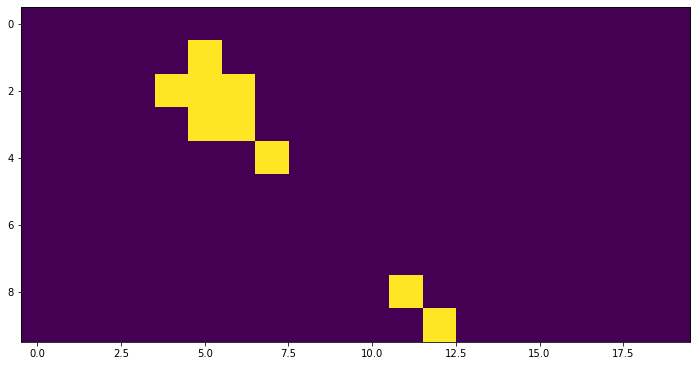

In [83]:
##ejemplo para arreglar el algoritmo anterior
maskWhere = np.zeros((10,20),dtype=np.uint8)
maskWhere[2,5]=1
maskWhere[3,6]=1
maskWhere[4,7]=1
maskWhere[8,11]=1
maskWhere[9,12]=1
print(maskWhere)
pos_y, pos_x=np.where(maskWhere)
print(pos)
distWhere = np.sqrt((pos_x-1)**2 + (pos_y-1)**2)
print(distWhere)
posWhere=np.where(distWhere == min(distWhere))
print(posWhere)
maskWhere1=cv.circle(maskWhere,(int(pos_x[posWhere]),int(pos_y[posWhere])),1,(1),-1)
print(pos_x[posWhere])
print(pos_y[posWhere])
print(maskWhere)
plt.figure(figsize=(12,12))
plt.imshow(maskWhere1, cmap='viridis')

In [84]:
#nuevos puntos de inicio(perpendicular y punto mas cercano al final)
#linea de inicio a centroide de obstaculo
#linea perpendicular a un punto y una recta


print(int(obstaculos[posObs,0]))
print(int(obstaculos[posObs,1]))

213
166


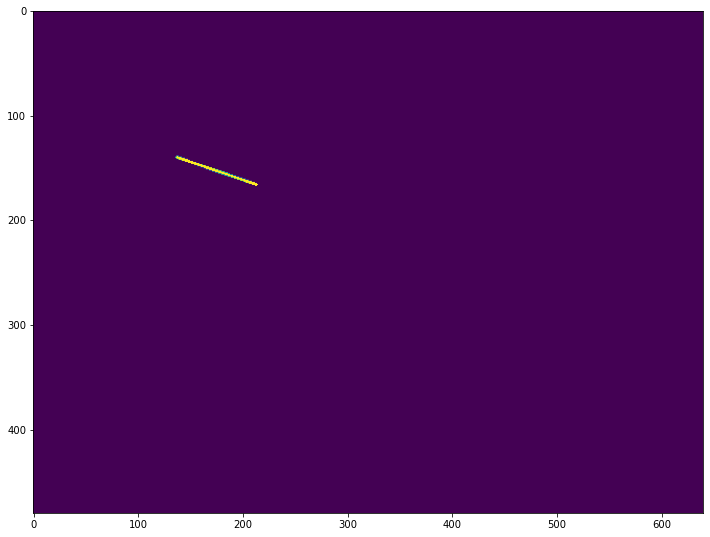

In [85]:
#linea de inicio a centroide de obstaculo
mask2 = np.zeros((480,640),dtype=np.uint8)

cv.line(mask2,(punto_inicio[0],punto_inicio[1]),(int(obstaculos[posObs,0]),int(obstaculos[posObs,1])),(255),2)
plt.figure(figsize= (12,12))
plt.imshow(mask2,cmap='viridis')

In [86]:
#establecer vector con los puntos
def vector_p(punto_inicial_x,punto_inicial_y,punto_final_x,punto_final_y):
    vector_x=punto_inicial_x-punto_final_x
    vector_y=punto_inicial_y-punto_final_y
    vector=np.array([vector_x,vector_y])
    return vector

In [87]:
#probando funcion
vector=vector_p(1,2,3,4)
print(vector)
vector2=vector_p(punto_inicio[0],punto_inicio[1],int(obstaculos[posObs,0]),int(obstaculos[posObs,1]))
print(vector2)


[-2 -2]
[-76 -26]


In [88]:
#vector perpendicular
def perpendicular_90(vector,escala=1):
    theta= np.deg2rad(90)
    matriz=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])*escala
    perpendicular=matriz.dot(vector)
    #perpendicular.dtype=int
    return perpendicular.astype(int)
def perpendicular_270(vector,escala=1):
    theta= np.deg2rad(-90)
    matriz=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])*escala
    perpendicular=matriz.dot(vector)
    #perpendicular.dtype=int
    return perpendicular.astype(int)
    

In [89]:
perp=perpendicular_90(vector2,10)
perp2=perpendicular_270(vector2,10)
print(perp)
print(perp2)

[ 259 -760]
[-260  760]


In [90]:
def dibujar_perpendiculares(centroide_obstaculo,perpendicular_90,perpendicular_270,tamaño_imagen=(480,640)):
    mask = np.zeros(tamaño_imagen,dtype=np.uint8)
    cv.line(mask,(centroide_obstaculo[0],centroide_obstaculo[1]),(centroide_obstaculo[0]+perpendicular_90[0],centroide_obstaculo[1]+perpendicular_90[1]),(255),2)
    cv.line(mask,(centroide_obstaculo[0],centroide_obstaculo[1]),(centroide_obstaculo[0]+perpendicular_270[0],centroide_obstaculo[1]+perpendicular_270[1]),(255),2)
    return mask

[213 166]


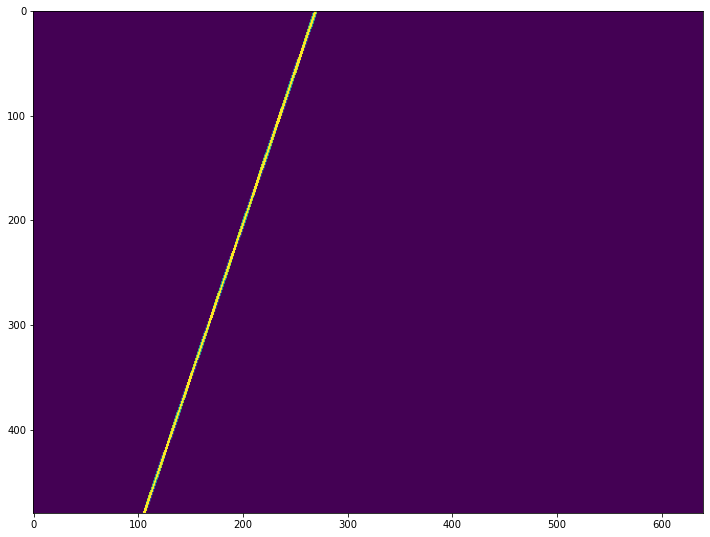

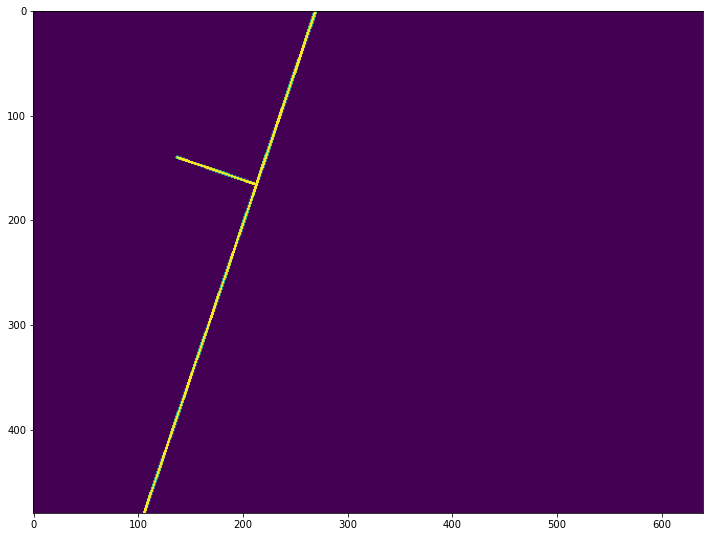

In [91]:
##dibujando la perpendicular
centroide_obstaculo=obstaculos[posObs,:2].flatten()
print(centroide_obstaculo)
maskPerp=dibujar_perpendiculares(centroide_obstaculo,perp,perp2)
plt.figure(figsize=(12,12))
plt.imshow(maskPerp, cmap='viridis')
##dibujando ambas lineas
mask3=mask2+maskPerp

plt.figure(figsize=(12,12))
plt.imshow(mask3, cmap='viridis')

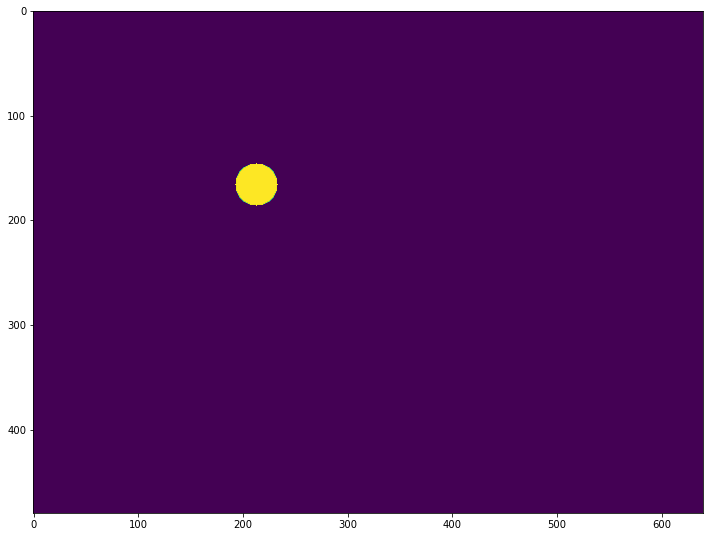

In [92]:
#dibujando obstaculo correspondiente
maskObs = np.zeros((480,640),dtype=np.uint8)
obstaculo_correspondiente= obstaculos[posObs].flatten()
maskObs= dibujarObs(maskObs,obstaculo_correspondiente[0],obstaculo_correspondiente[1],obstaculo_correspondiente[2])
plt.figure(figsize=(12,12))
plt.imshow(maskObs,cmap='viridis')

[  0 105 255]


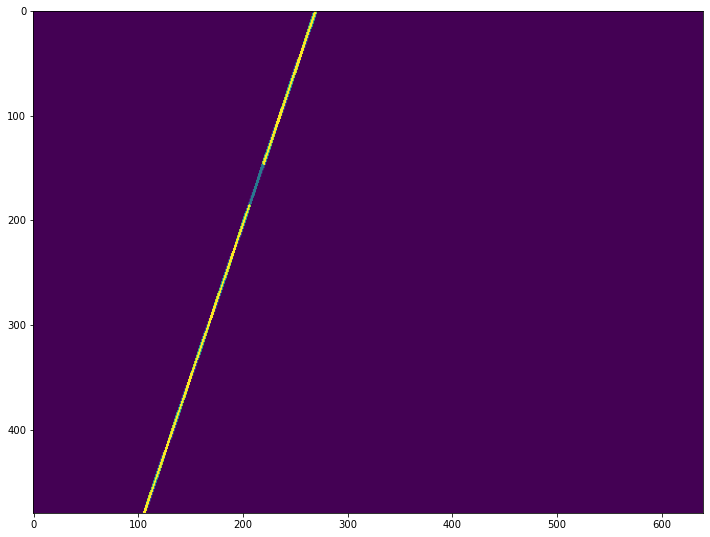

In [93]:
#comparando las 2 imagenes
diferencias2=0
diferencias2=cv.subtract(maskPerp,maskObs)
plt.figure(figsize=(12,12))
plt.imshow(diferencias2, cmap='viridis')
print(np.unique(diferencias2))

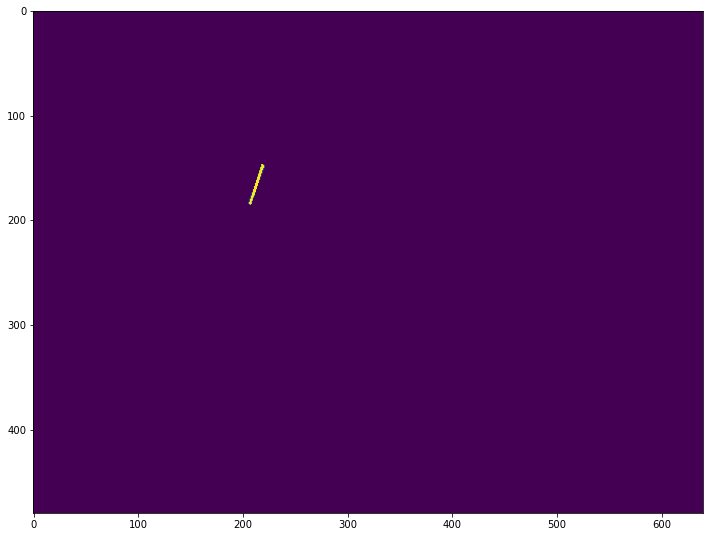

In [94]:
#separar interseccion

#dibujando las intersecciones
maskFinal=0
inters = np.array([105], dtype=np.uint8)
maskFinal = seg_color(diferencias2, inters, inters)
#print(maskInicio.shape)
plt.figure(figsize=(12,12))
plt.imshow(maskFinal, cmap='viridis')

[[[207 185 219 147]]]


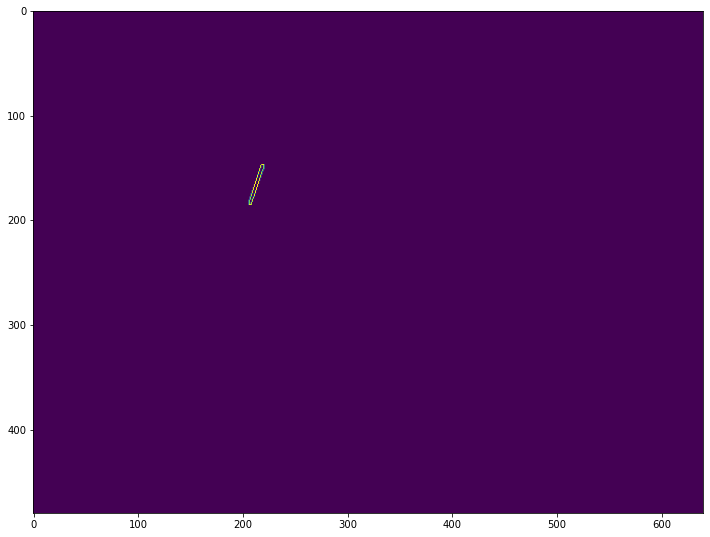

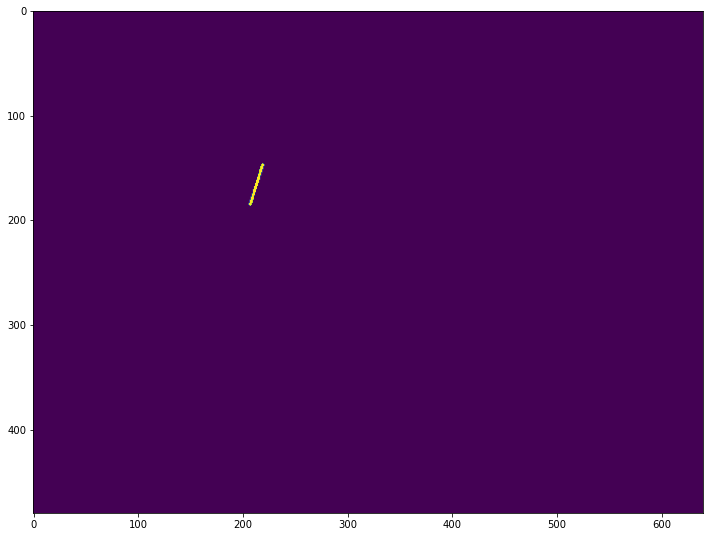

In [95]:
#puntos extremos. forma 1 con funcion HoughLinesP
minLineLength = 1
maxLineGap = 10000
img = np.zeros((480,640),dtype=np.uint8)
edges = cv.Canny(maskFinal,50,150,apertureSize = 3)
lines = cv.HoughLinesP(maskFinal,1,np.pi/180,41)
for x1,y1,x2,y2 in lines[0]:
    cv.line(img,(x1,y1),(x2,y2),(255),2)


print(lines)
plt.figure(figsize=(12,12))
plt.imshow(edges, cmap='viridis')
plt.figure(figsize=(12,12))
plt.imshow(img, cmap='viridis')

1
[219 207]
[147 185]


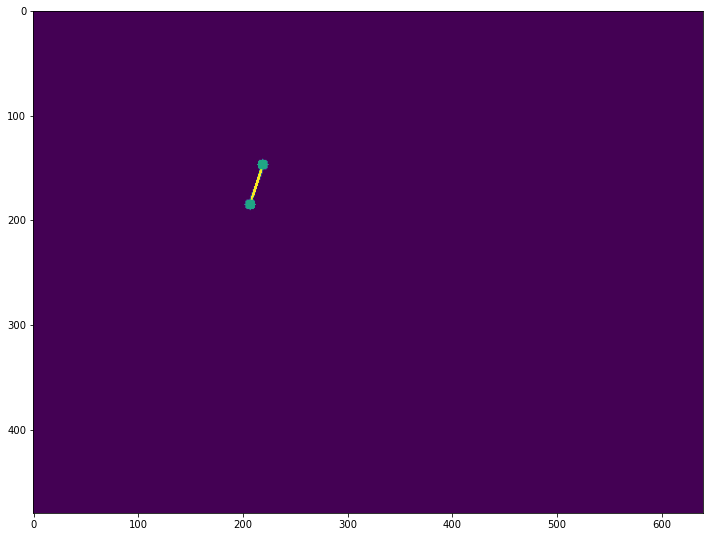

In [96]:
#puntos extremos. forma 2 con distancia euclidiana desde el centroide
puntosF_y, puntosF_x=np.where(maskFinal)
distancia3 = np.sqrt((puntosF_x-obstaculo_correspondiente[0])**2 + (puntosF_y-obstaculo_correspondiente[1])**2)
posF=np.where(distancia3 == max(distancia3))
posF= np.array(posF[0])
print(posF[0])
print(puntosF_x[posF])
print(puntosF_y[posF])
##dibujando el puntos lejanos al centroide

maskFinal=dibujarObs(maskFinal,int(puntosF_x[posF[0]]),int(puntosF_y[posF[0]]),5)
maskFinal=dibujarObs(maskFinal,int(puntosF_x[posF[1]]),int(puntosF_y[posF[1]]),5)
plt.figure(figsize=(12,12))
plt.imshow(maskFinal, cmap='viridis')

In [97]:
#retirar obstaculo
#guardar trayectoria(via points)
#nuevo punto inicial

In [98]:
#punto mas cercano a punto final
puntosF_x=puntosF_x[posF]
puntosF_y=puntosF_y[posF]
distanciaF = np.sqrt((puntosF_x-punto_final[0])**2+(puntosF_y-punto_final[1])**2)
posObsF=np.where(distanciaF == min(distanciaF))

In [99]:
print(distanciaF)
print(posObsF)
print(puntosF_x[posObsF[0]])
print(puntosF_y[posObsF[0]])

[287.46651979 286.92333471]
(array([1], dtype=int64),)
[207]
[185]
